### ROC_AUC

Receiver Operator Characteristic(ROC) CUrve is well-known in evaluating classification performance. Owing to its superiority in dealing with imbalanced and cost-sensitive data. The ROC curve has been exploited as a popular metric in evaluating ML models.

### For Classification Problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv('datasets/santander-train.csv', nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

In [5]:
X.shape, y.shape

((20000, 370), (20000,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Remove Constant, quasi Constant, duplicate features

In [7]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [8]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [9]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [10]:
X_train_T.duplicated().sum()

18

In [11]:
dup_features = X_train_T.duplicated()

In [12]:
features_non_dup = [not i for i in dup_features]

In [13]:
X_train_unique = X_train_T[features_non_dup].T
X_test_unique = X_test_T[features_non_dup].T

In [14]:
X_train_unique.head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,17282.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63200.700000
1,38270.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88640.610000
2,31526.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96314.160000
3,38737.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117568.020000
4,16469.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [15]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### ROC_AUC Score

In [19]:
roc_auc = []
for feature in X_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train_unique[feature].to_frame(), y_train)
    y_pred = clf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))

In [20]:
roc_auc

[0.5020561820568537,
 0.5,
 0.5,
 0.49986968986187125,
 0.501373452866903,
 0.49569976544175137,
 0.5028068643863192,
 0.49986968986187125,
 0.5,
 0.5,
 0.4997393797237425,
 0.5017643832812891,
 0.49569976544175137,
 0.49960906958561374,
 0.49895751889497003,
 0.49700286682303885,
 0.49960906958561374,
 0.5021553136956755,
 0.4968725566849101,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49986968986187125,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5029371745244479,
 0.4959603857180089,
 0.5,
 0.5048318679438659,
 0.4997393797237425,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49921813917122754,
 0.49921813917122754,
 0.498246009551813

In [23]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values.sort_values(ascending=False, inplace=True)

In [24]:
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
         ...   
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: float64

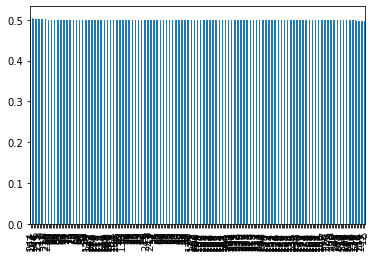

In [25]:
roc_values.plot.bar()

In [26]:
sel  = roc_values[roc_values>0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [27]:
X_train_roc = X_train_unique[sel.index]
X_test_roc = X_test_unique[sel.index]

In [28]:
X_train_roc.shape, X_test_roc.shape

((16000, 11), (4000, 11))

### Build the Model

In [29]:
def random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print('Accuracy Score : ', accuracy_score(y_test, y_predict))

In [30]:
%%time
random_forest(X_train_roc, X_test_roc, y_train, y_test)

Accuracy Score :  0.95275
Wall time: 812 ms


In [31]:
%%time
random_forest(X_train, X_test, y_train, y_test)

Accuracy Score :  0.9585
Wall time: 1.33 s


In [32]:
%%time
random_forest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy Score :  0.95875
Wall time: 1.14 s


### For Regresison Problem

In [33]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
boston = load_boston()

In [35]:
X = pd.DataFrame(data = boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
y = boston.target

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
mse = []
for feature in X_train.columns:
    model = LinearRegression()
    model.fit(X_train[feature].to_frame(), y_train)
    y_pred = model.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test, y_pred))

In [42]:
mse

[76.38674157646072,
 84.66034377707905,
 77.02905244667242,
 79.36120219345942,
 76.95375968209433,
 46.907351627395315,
 80.3915476111525,
 82.61874125667718,
 82.46499985731933,
 78.30831374720843,
 81.79497121208001,
 77.75285601192718,
 46.33630536002592]

In [43]:
mse = pd.Series(mse, index=X_train.columns)
mse.sort_values(ascending=False, inplace=True)
mse

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

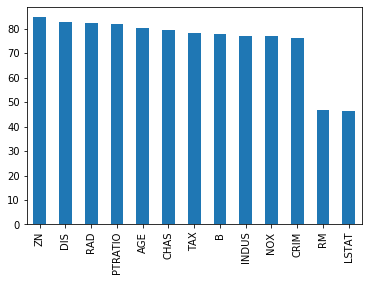

In [44]:
mse.plot.bar()

In [45]:
X_train_mse = X_train[['RM','LSTAT']]
X_test_mse = X_test[['RM','LSTAT']]

In [52]:
%%time
model = LinearRegression()
model.fit(X_train_mse, y_train)
y_pred = model.predict(X_test_mse)
print('r2 score : ', r2_score(y_test, y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Standard Deviation : ', np.std(y))

r2 score :  0.5409084827186417
RMSE :  6.114172522817782
Standard Deviation :  9.188011545278203
Wall time: 3.99 ms


In [53]:
%%time
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('r2 score : ', r2_score(y_test, y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Standard Deviation : ', np.std(y))

r2 score :  0.5892223849182507
RMSE :  5.783509315085135
Standard Deviation :  9.188011545278203
Wall time: 5 ms
